In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
hdu=fits.open('spectrum_20240728_0000023_exp01_farred.fits')
head=hdu[0].header
head

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2064                                                  
NAXIS2  =                    6                                                  
EXTEND  =                    T                                                  
DATE    = '2024-07-28T08:07:00.111210'                                          
DATE-OBS= '2024-07-28'                                                          
TELESCOP= 'het     '                                                            
INSTRUME= 'lrs2    '                                                            
OBJECT  = 'S240615dg_240708_7_056_E'                                            
OBSERVER= ''                                                                    
TELRA   = '+00:32:59.7'     

In [3]:
dt=hdu[0].data
dt.shape

(6, 2064)

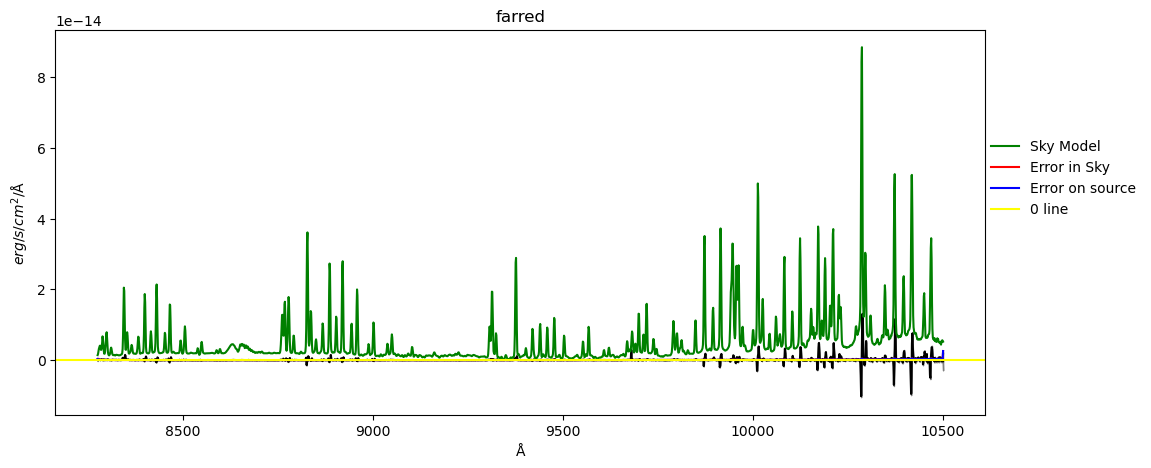

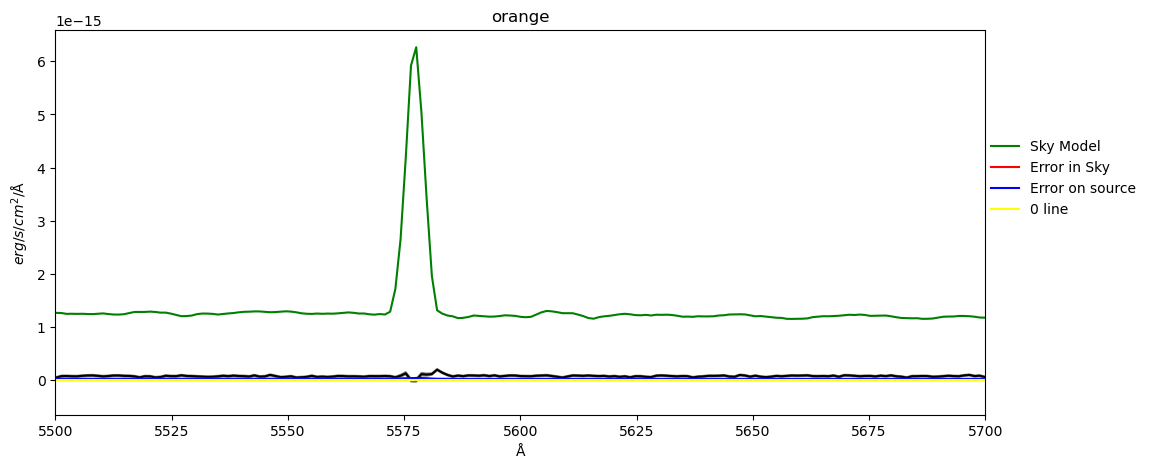

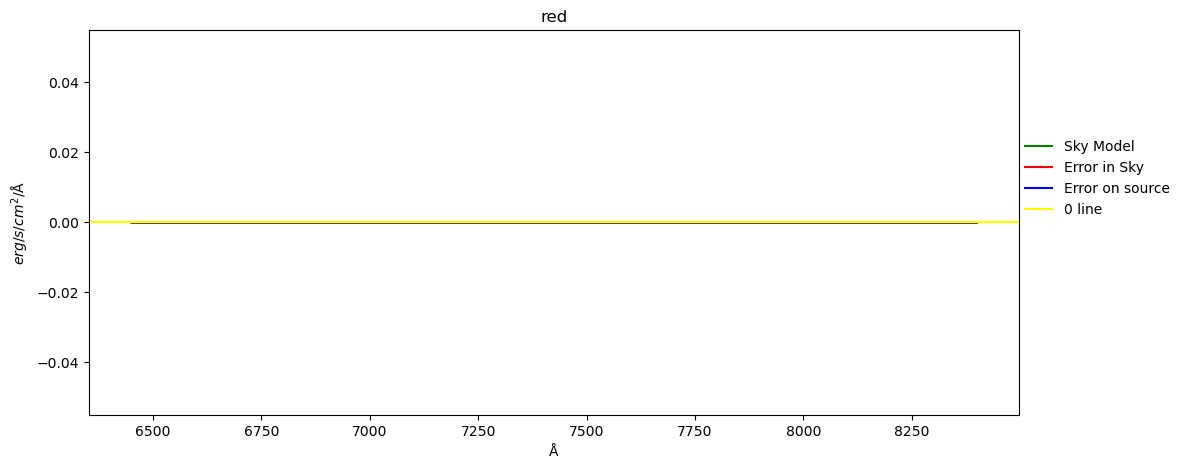

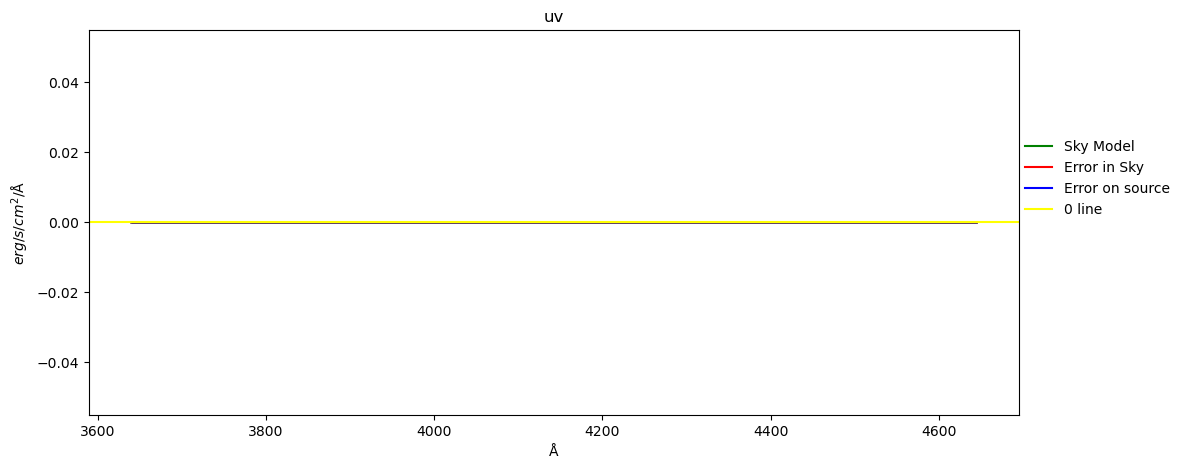

In [7]:
files=['farred','orange','red','uv']

for fil in files:
    hdu=fits.open('spectrum_20240728_0000023_exp01_'+fil+'.fits')
    x=hdu[0].data[0]
    y=hdu[0].data[1]
    dy=hdu[0].data[3]
    s=hdu[0].data[2]
    ds=hdu[0].data[4]
    
    plt.figure(figsize=(12,5))
    plt.plot(x,y,color='black')
    plt.plot(x,s,color='green',label='Sky Model')
    plt.plot(x,ds,color='red',label='Error in Sky')
    plt.plot(x,dy,color='blue', label='Error on source')
    
    plt.fill_between(x,y+dy,y-dy,color='grey')
    #plt.fill_between(x,s+ds,s-ds,color='skyblue')

    if fil=='orange':
        plt.xlim(5500,5700)
        #plt.axvline(4580)
       # plt.axvline(4545)
        
    plt.axhline(0,color='yellow',label='0 line')    
    plt.title(fil)
    plt.legend(loc=(1,0.5),frameon=False)
    plt.xlabel('\u00C5')
    plt.ylabel('$erg/s/cm^2/$'+'\u00C5')  

In [6]:
import numpy as np

In [14]:
d=fits.open('spectrum_20240728_0000023_exp01_orange.fits')[0].data
x=d[0]
y=d[2]
np.where(y==np.nanmax(y))

(array([840]),)

In [16]:
x[840]/1140

4.892638467229635

In [ ]:
5577.607852641784-4861